In [1]:
import numpy as np
from sde_euler import sde_euler
import scipy.stats as st
import matplotlib.pyplot as plt

In [26]:
class Model:

    def __init__(self, N, alpha, sig):
        """Initialise variables"""
        self.dt = 1e-3
        self.t = np.arange(0, 1+self.dt, self.dt)
        self.N = N
        self.x0 = np.zeros(self.N)
        self.x = np.zeros((len(self.t), self.N))
        self.xbar = np.zeros(len(self.t))
        self.alpha = alpha
        self.sig = sig
        self.f = lambda x: alpha * (np.mean(x) - x)
        self.g = lambda x: sig
        self.eta = -0.7

    def simulate(self):
        """Simulate the model"""
        self.x = sde_euler(self.f, self.g, 1, self.dt, self.x0)

    def erdosrenyi(self, p):
        """
        Function to generate an Erdős–Rényi random graph.

        Args:
            obj: The object containing the graph.
            p: The probability of an edge being present.

        Returns:
            The object with the updated graph.
        """

        # Generate a random matrix with entries 0 or 1, where 1 indicates an edge.
        self.A = np.random.rand(self.N, self.N) < p

        # Make the matrix upper triangular.
        self.A = np.triu(self.A, k=1)

        # Add the identity matrix to the matrix.
        self.A = self.A + self.A.T + np.eye(self.N)

    def network(self):
        self.f = lambda x: (self.alpha / self.N) * (np.matmul(self.A, x) - x*np.sum(self.A, axis=1))

    def plot_trajectory(self, opt=True):
        self.xbar = np.mean(self.x, 1)
        fig, ax = plt.subplots(figsize=(15, 5))

        if opt:
            ax.plot(self.t, self.x, 'k')

        # Average Line
        ax.plot(self.t, self.xbar, 'green', linewidth=2)

        ax.set_xlabel('t')
        ax.set_ylabel(r'$X_{t}$')

        plt.xlim([0, 1])
        plt.show()

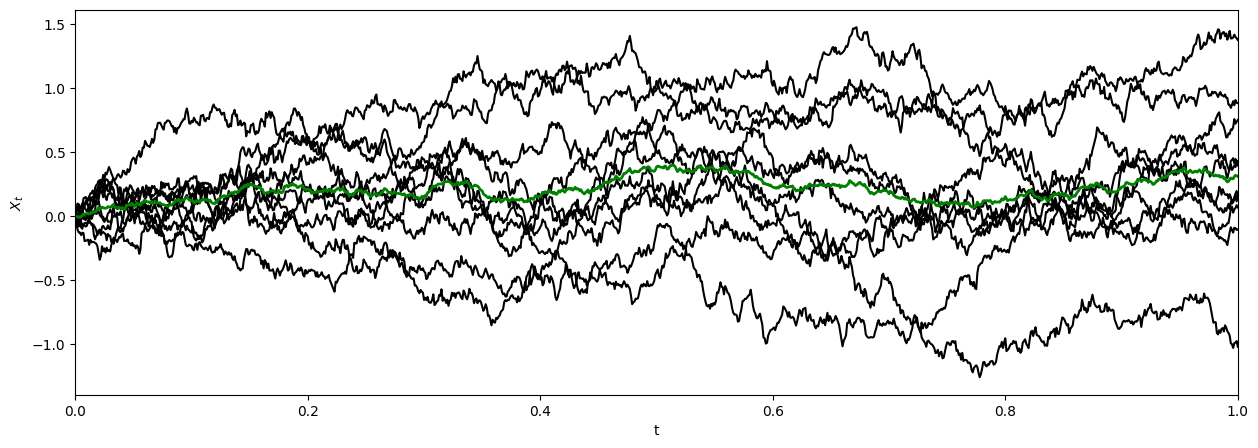

In [31]:
obj = Model(10, 1, 1)
obj.A = np.ones([10, 10])
obj.network()
obj.simulate()
obj.plot_trajectory()